# Proyecto Bimestral de Python
# Análisis del Dataset de PeliPlay

### 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlsxwriter
import seaborn as sns

In [14]:
path_peliculas = "C:\\Users\\ro199\\Documents\\Nuevo\\arania_peliculas\\tmp\\DatosP.csv"

In [15]:
peliculas_dataset = pd.read_csv(path_peliculas)
print(peliculas_dataset.shape)

(1176, 7)


In [16]:
Todas_columnas = peliculas_dataset.columns.values
print(Todas_columnas)

['categoria' 'clasificacion' 'cometarios' 'likes' 'rating' 'titulo'
 'vistas']


In [17]:
display(peliculas_dataset.head(5))

,categoria,clasificacion,cometarios,likes,rating,titulo,vistas
0,"Accion,Comedia,Crimen",2020,0,1,7.0,Aves de Presa (y la Fantabulosa Emancipacion d...,29134
1,"Animacion,Familia",2014,0,0,6.7,Campanilla: Hadas y Piratas (2014),1912
2,"Animacion,Comedia,Aventura,Fantasía,Familia",2019,0,0,7.0,Mr. Link: El origen perdido (2019),2209
3,"Drama,Aventura",2014,0,1,5.6,Noe (2014),2520
4,"Documental,Drama",2014,0,0,6.5,Manny (2014),1208


In [62]:
top100_videos_mas_vistos = peliculas_dataset['vistas'].sort_values(ascending=False).head(100)
videos_mas_vistos = peliculas_dataset.loc[top100_videos_mas_vistos.index,['categoria','clasificacion','titulo','vistas','rating']]
print('TOP 100:')
display(videos_mas_vistos)

TOP 100:


,categoria,clasificacion,titulo,vistas,rating
1137,"Accion,Aventura,Comedia,Estrenos2019,Fantasía",2019,Jumanji: siguiente nivel (2019),439758,7.0
1035,"Accion,Suspense,Aventura",2019,6 en la sombra (2019),135977,7.0
922,"Drama,Estrenos2019",2019,1917 (2019),127981,7.9
892,"Accion,Crimen,Estrenos2020,Suspense",2020,Bad Boys for Life (2020),97098,6.7
918,"Terror,Suspense",2019,Countdown (2019),83873,6.6
942,"Accion,Crimen,Drama,Suspense",2019,Black and Blue (2019),78807,5.7
944,"Animacion,Accion,Aventura,Comedia",2019,Espias con disfraz (2019),72583,7.5
951,"Drama,Aventura,Familia",2019,Togo (2019),63368,7.3
941,"Drama,Comedia",2019,Los dos papas (2019),43941,7.7
0,"Accion,Comedia,Crimen",2020,Aves de Presa (y la Fantabulosa Emancipacion d...,29134,7.0


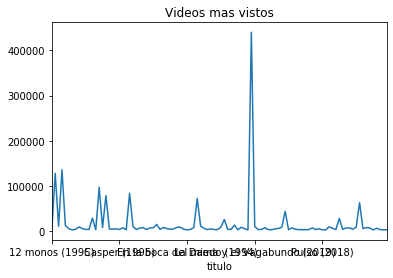

In [30]:
videos_mas_vistos.groupby(['titulo'])['vistas'].max().plot(kind='line', title="Videos mas vistos")

In [32]:
top100_videos_menos_vistos = peliculas_dataset['vistas'].sort_values(ascending=True).head(100)
videos_menos_vistos = peliculas_dataset.loc[top100_videos_menos_vistos.index,['categoria','clasificacion','titulo','vistas']]
print('TOP 100:')
display(videos_menos_vistos)

TOP 100:


,categoria,clasificacion,titulo,vistas
456,NaN,2007,Alvin and the Chipmunks: The Valentines Collec...,20
172,Documental,2011,Urbanized (el disenio de las ciudades) (2011),22
722,Comedia,2002,Bienvenidos a Collinwood (2002),23
501,"Drama,Música",2007,I'm not there (2007),25
344,NaN,2009,Bala mordida (2009),26
329,Drama,2009,The Damned United (2009),27
266,"Crimen,Accion,Suspense",2011,Hobo with a Shotgun (2011),28
263,"Drama,Familia",2013,La Navidad vuelve a Canaan (2013),28
225,"Drama,Suspense",2010,Frankie y Alice (Mente criminal) (2010),29
725,"Animacion,Familia",2002,En busca del valle encantado IX: Travesia a lo...,30


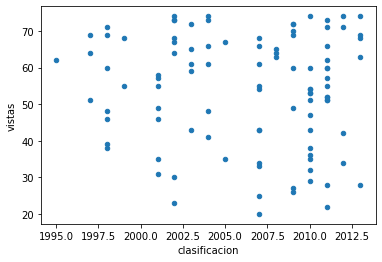

In [33]:
my_plot = videos_menos_vistos.plot("clasificacion", "vistas", kind="scatter")
plt.show()

In [44]:
top20_videos_likes = peliculas_dataset['likes'].sort_values(ascending=False).head(20)
videos_mas_likes = peliculas_dataset.loc[top20_videos_likes.index,['categoria','clasificacion','titulo','likes','vistas']]
print('TOP 20:')
display(videos_mas_likes)

TOP 20:


,categoria,clasificacion,titulo,likes,vistas
1137,"Accion,Aventura,Comedia,Estrenos2019,Fantasía",2019,Jumanji: siguiente nivel (2019),34,439758
924,"Fantasía,Animacion,Aventura",2004,El castillo ambulante (2004),7,8016
1035,"Accion,Suspense,Aventura",2019,6 en la sombra (2019),6,135977
926,"Animacion,Fantasía,Aventura,Accion,Familia",2019,How to Train Your Dragon: Homecoming (2019),6,25940
892,"Accion,Crimen,Estrenos2020,Suspense",2020,Bad Boys for Life (2020),5,97098
1105,"Comedia,Familia,Fantasía,Terror",1993,El retorno de las brujas (1993),5,6212
965,"Aventura,Fantasía,Accion,Suspense,Cienciaficcion",1997,El quinto elemento (1997),4,8370
989,"Animacion,Drama",1988,La tumba de las luciernagas (1988),4,1896
895,"Drama,Romance",2019,Only You (2019),4,7688
923,"Accion,Aventura,Cienciaficcion",2019,Star Wars: El ascenso de Skywalker (2019),4,28489


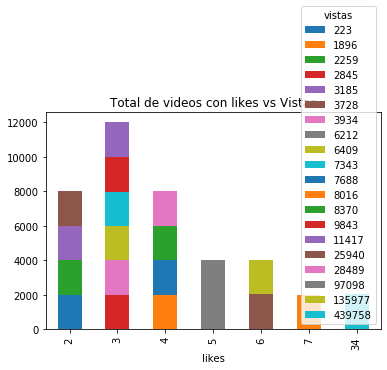

In [47]:
videos_mas_likes.groupby(['likes','vistas']).sum()["clasificacion"].unstack().plot(kind='bar',stacked=True,title="Total de videos con likes vs Vistas")

In [53]:
top20_videos_dislikes = peliculas_dataset['likes'].sort_values(ascending=True).head(20)
videos_mas_dislikes = peliculas_dataset.loc[top20_videos_dislikes.index,['categoria','clasificacion','titulo','likes']]
print('TOP 20:')
display(videos_mas_dislikes)

TOP 20:


,categoria,clasificacion,titulo,likes
587,"Fantasía,Animacion,Cienciaficcion,Familia,Accion",2003,Atlantis: El regreso de Milo (2003),0
710,"Accion,Crimen,Suspense",2001,Spy Game (Juego de espias) (2001),0
711,"Aventura,Fantasía,Animacion,Familia",2002,Peter Pan en Regreso al Pais de Nunca Jamas (2...,0
712,Drama,2002,Dragonfly (La sombra de la libelula) (2002),0
713,"Accion,Suspense",2002,El control de la venganza (2002),0
714,"Crimen,Misterio,Suspense",2002,Insomnio (2002),0
715,Comedia,2002,Cadete Kelly (2002),0
716,"Drama,Suspense,Crimen,Misterio",2002,Irreversible (2002),0
717,"Accion,Aventura,Comedia,Suspense",2002,9 dias (2002),0
718,"Comedia,Drama,Romance",2002,Secretary (2002),0


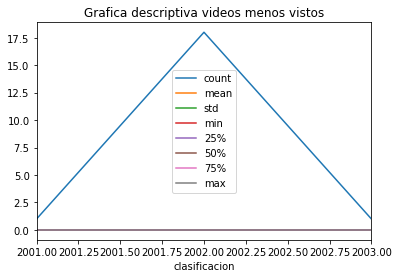

In [54]:
videos_mas_dislikes.groupby(['clasificacion'])['likes'].describe().plot(kind='line', title = "Grafica descriptiva videos menos vistos")

In [58]:
porcentaje_vistos_titulo = videos_mas_vistos['clasificacion']
print('Procentaje de videos mas vistos')
display(porcentaje_vistos_titulo.value_counts(normalize=True))

Procentaje de videos mas vistos


2019    0.38
1997    0.17
1995    0.11
1996    0.08
2018    0.04
2020    0.03
2016    0.03
1993    0.03
1994    0.03
1990    0.02
2002    0.01
1998    0.01
2004    0.01
2007    0.01
2011    0.01
2013    0.01
2014    0.01
1988    0.01
Name: clasificacion, dtype: float64

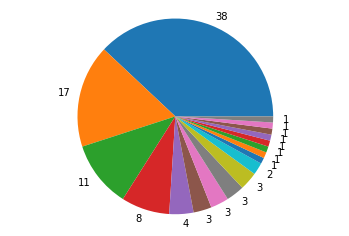

In [60]:
name = []
for i in porcentaje_vistos_titulo.value_counts():
    name.append(i)
values = [0.38,0.17,0.11,0.08,0.04,0.03,0.03,0.03,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
plt.pie(values, labels=name)
plt.axis("equal")
plt.show()

Procentaje de videos mas vistos


7.0    0.4
7.9    0.2
6.6    0.2
6.7    0.2
Name: rating, dtype: float64

In [70]:
top20_videos_rating = peliculas_dataset['rating'].sort_values(ascending=False).head(20)
videos_mas_rating = peliculas_dataset.loc[top20_videos_rating.index,['categoria','clasificacion','titulo','likes','rating']]
print('TOP 20:')
display(videos_mas_rating)

TOP 20:


,categoria,clasificacion,titulo,likes,rating
1045,NaN,1995,Disney Sing-Along-Songs: Pocahontas - Colors o...,0,8.8
750,"Drama,Familia",1988,Juliana (1988),0,8.6
894,"Accion,Fantasía",2014,Baifa monu zhuan zhi mingyue Tianguo (2014),0,8.5
304,"Comedia,Drama",2010,"Cheila, una casa pa’ Maita (2010)",0,8.5
692,"Drama,Crimen",2002,Ciudad de Dios (2002),0,8.4
794,Drama,1998,American History X (1998),0,8.4
967,"Drama,Cienciaficcion,Animacion",1997,Neon Genesis Evangelion: El Fin del Evangelion...,1,8.4
989,"Animacion,Drama",1988,La tumba de las luciernagas (1988),4,8.4
924,"Fantasía,Animacion,Aventura",2004,El castillo ambulante (2004),7,8.4
1006,"Drama,Romance",1988,Cinema Paradiso (1988),0,8.4


In [72]:
porcentaje_vistos_titulo = videos_mas_rating['titulo']
print('Procentaje de videos con mas rating')
display(porcentaje_vistos_titulo.value_counts(normalize=True))

Procentaje de videos con mas rating


American History X (1998)                                          0.05
La tumba de las luciernagas (1988)                                 0.05
El chanfle 2 (1982)                                                0.05
Lotoman (2011)                                                     0.05
Juliana (1988)                                                     0.05
How to Train Your Dragon: Homecoming (2019)                        0.05
Incendies (2010)                                                   0.05
Cinema Paradiso (1988)                                             0.05
El castillo ambulante (2004)                                       0.05
Ciudad de Dios (2002)                                              0.05
¡Olvidate de mi! (2004)                                            0.05
Cheila, una casa pa’ Maita (2010)                                  0.05
Neon Genesis Evangelion: El Fin del Evangelion (1997)              0.05
Memories of Murder (Cronica de un asesino en serie) (2003)      

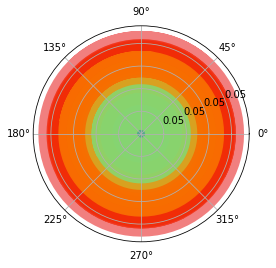

In [80]:
import pylab as pl
ax = pl.axes([0.5, 0.5, 0.5, 0.95], polar=True)
lista = []
N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * 10
bars = pl.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(pl.cm.jet(r/10.))
    bar.set_alpha(0.5)
for i in range(1,20):
    lista.append(0.05)
ax.set_yticklabels(lista)
pl.show()

In [83]:
top20_videos_rating = peliculas_dataset['rating'].sort_values(ascending=True).head(20)
videos_menos_rating = peliculas_dataset.loc[top20_videos_rating.index,['categoria','clasificacion','titulo','likes','rating']]
print('TOP 20:')
display(videos_menos_rating)

TOP 20:


,categoria,clasificacion,titulo,likes,rating
921,"Drama,Suspense",2018,Pulso (2018),0,0.0
552,"Música,Documental",2005,Dr. Feelgood: Live in London (2005),0,0.0
456,NaN,2007,Alvin and the Chipmunks: The Valentines Collec...,0,0.0
952,Drama,2019,La noche de las dos lunas (2019),2,0.0
344,NaN,2009,Bala mordida (2009),0,0.0
934,NaN,2020,Crossword Mysteries: Abracadaver (2020),1,0.0
79,"Accion,Cienciaficcion",2012,Mantera (2012),0,2.8
1118,"Comedia,Cienciaficcion",1992,Space Case (1992),0,3.0
638,"Terror,Fantasía,Cienciaficcion",2003,Puppet Master: The Legacy (2003),0,3.0
943,"Cienciaficcion,Romance",2019,ANYA (2019),1,3.0


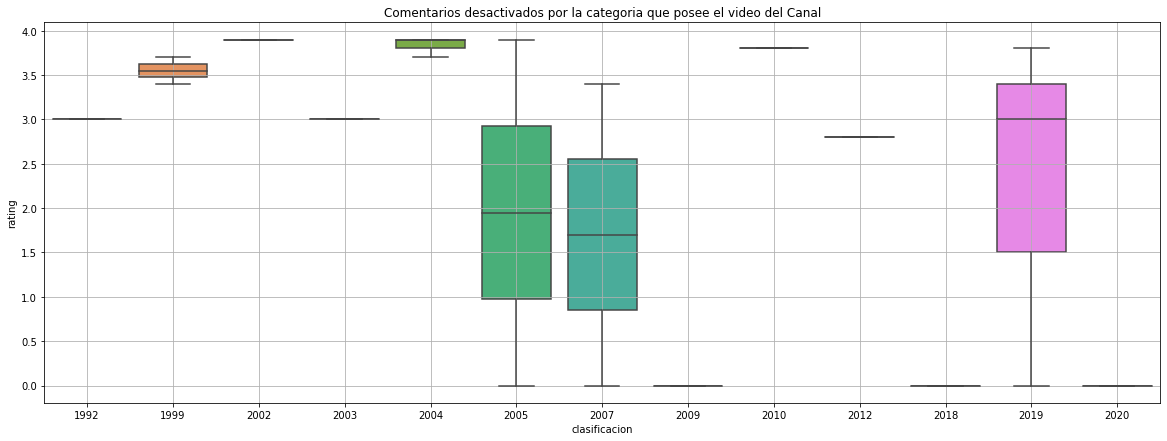

In [84]:
plt.figure(figsize = (20,7))
sns.boxplot(  y = videos_menos_rating['rating'] ,x = videos_menos_rating['clasificacion'])
plt.grid(True)
plt.title('Comentarios desactivados por la categoria que posee el video del Canal')
plt.show()

In [88]:
porcentaje_comment_title = videos_menos_rating['categoria']
print('Procentaje de videos mas comentados')
display(porcentaje_comment_title.value_counts(normalize=True))

Procentaje de videos mas comentados


Terror                                   0.1250
Terror,Suspense                          0.0625
Accion,Cienciaficcion                    0.0625
Terror,Misterio                          0.0625
Accion,Cienciaficcion,Suspense           0.0625
Terror,Fantasía,Cienciaficcion           0.0625
Música,Documental                        0.0625
Animacion,Familia,Cienciaficcion         0.0625
Fantasía,Comedia,Familia,Aventura        0.0625
Drama,Suspense                           0.0625
Drama                                    0.0625
Comedia,Cienciaficcion                   0.0625
Cienciaficcion,Romance                   0.0625
Accion,Aventura,Comedia                  0.0625
Aventura,Terror,Accion,Cienciaficcion    0.0625
Name: categoria, dtype: float64

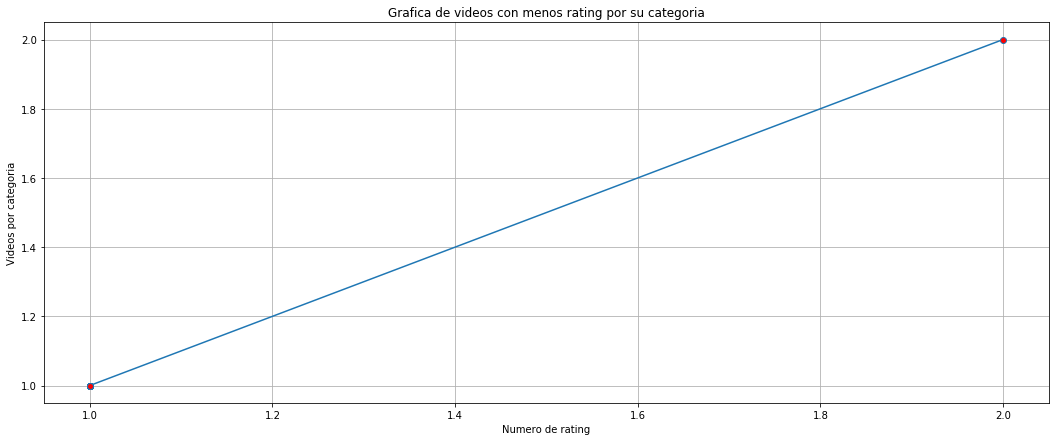

In [102]:
name1 = []
for i in porcentaje_comment_title.value_counts():
    name1.append(i)
plt.figure(figsize = (18,7))
plt.plot(porcentaje_comment_title.value_counts() , name1, linestyle = '-', marker = 'o', markerfacecolor = 'red')
plt.grid(True)
plt.xlabel('Numero de rating')
plt.ylabel('Videos por categoria')
plt.title('Grafica de videos con menos rating por su categoria')
plt.show()